Student number: 22401715
Surname & Initials: NKOSI VS

This notebook presents an end-to-end machine learning project focused on crime analysis in South Africa.
It uses real SAPS and Stats SA datasets to identify crime hotspots and forecast future crime trends through classification and time series models.
The analysis includes data cleaning, exploratory data visualization, and the creation of a Decision Tree Classifier for hotspot prediction.
A Linear Regression model is then applied to forecast aggravated robbery incidents over the next five years.
The notebook concludes with insights for law enforcement planning and forms the analytical foundation for an interactive Streamlit dashboard and drone simulation.

links for datasets: https://www.kaggle.com/datasets/misterseitz/south-africa-crime-population-statistics?select=ProvincePopulation.csv

Link 2: https://www.kaggle.com/datasets/harutyunagababyan/crime-stats-of-south-africa-2011-2023

The following code is to load the datasets.
Dataset 1:
**Dataset 1: Aggravated Robbery Incidents by Category
This dataset records the number of aggravated robbery incidents reported across different provinces and categories in South Africa. It is directly relevant to the exam theme, as it enables both the **classification of crime hotspots** and the **forecasting of crime trends**. It covers multiple years and categories, allowing temporal and spatial analysis of crime patterns. The data originates from the South African Police Service (SAPS), making it credible and official.

In [6]:
import pandas as pd
crime_df = pd.read_csv('aggravated_robbery_incidents_by_category.csv')

Dataset 2
This dataset provides demographic and population information per province, such as total population and population density. It complements the crime dataset by allowing normalization of crime incidents per capita and by offering socioeconomic context to crime levels. The data originates from Statistics South Africa (Stats SA), an official source, ensuring credibility.

In [9]:
import pandas as pd
pop_df = pd.read_csv('ProvincePopulation.csv')

The following code is to display previews


In [11]:
# Display previews
print("=== Crime Dataset Preview ===")
display(crime_df.head())

print("\n=== Population Dataset Preview ===")
display(pop_df.head())

=== Crime Dataset Preview ===


,Geography,Aggravated Robbery,Financial Year,Count
0,ZA,Car Hijacking,2011/2012,9417
1,ZA,Car Hijacking,2012/2013,9931
2,ZA,Car Hijacking,2013/2014,11180
3,ZA,Car Hijacking,2014/2015,12773
4,ZA,Car Hijacking,2015/2016,14602



=== Population Dataset Preview ===


,Province,Population,Area,Density
0,Gauteng,12272263,18178,675.1
1,Kwazulu/Natal,10267300,94361,108.8
2,Mpumalanga,4039939,76495,52.8
3,Western Cape,5822734,129462,45.0
4,Limpopo,5404868,125755,43.0


Check structure and missing data

In [21]:
print("\n=== Crime Dataset Info ===")
crime_df.info()

print("\n=== Population Dataset Info ===")
pop_df.info()


=== Crime Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   geography           820 non-null    object
 1   aggravated_robbery  820 non-null    object
 2   financial_year      820 non-null    object
 3   count               820 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.8+ KB

=== Population Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    9 non-null      object 
 1   population  9 non-null      int64  
 2   area        9 non-null      int64  
 3   density     9 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 420.0+ bytes


The following code is to clean the dataset

 Clean column names (remove spaces, make lowercase)
 Check for missing values
 Drop unnecessary columns if they exist
 Preview cleaned data

In [22]:

crime_df.columns = crime_df.columns.str.strip().str.replace(' ', '_').str.lower()
pop_df.columns = pop_df.columns.str.strip().str.replace(' ', '_').str.lower()


print("Missing values in crime dataset:\n", crime_df.isnull().sum())
print("\nMissing values in population dataset:\n", pop_df.isnull().sum())


crime_df.head(), pop_df.head()


Missing values in crime dataset:
 geography             0
aggravated_robbery    0
financial_year        0
count                 0
dtype: int64

Missing values in population dataset:
 province      0
population    0
area          0
density       0
dtype: int64


(  geography aggravated_robbery financial_year  count
 0        ZA      Car Hijacking      2011/2012   9417
 1        ZA      Car Hijacking      2012/2013   9931
 2        ZA      Car Hijacking      2013/2014  11180
 3        ZA      Car Hijacking      2014/2015  12773
 4        ZA      Car Hijacking      2015/2016  14602,
         province  population    area  density
 0        Gauteng    12272263   18178    675.1
 1  Kwazulu/Natal    10267300   94361    108.8
 2     Mpumalanga     4039939   76495     52.8
 3   Western Cape     5822734  129462     45.0
 4        Limpopo     5404868  125755     43.0)

The first dataset has column "provinces" then the other has "geography" for provinces column so the following code renames the "geography" column to "provinces" for merge to successfully occur.


In [27]:
crime_df.rename(columns={'geography': 'province'}, inplace=True)
pop_df.rename(columns={'province_name': 'province'}, inplace=True)


Merge the datasets

In [28]:
merged_df = pd.merge(crime_df, pop_df, on='province', how='left')
merged_df.head()





,province,aggravated_robbery,financial_year,count,population,area,density
0,ZA,Car Hijacking,2011/2012,9417,NaN,NaN,NaN
1,ZA,Car Hijacking,2012/2013,9931,NaN,NaN,NaN
2,ZA,Car Hijacking,2013/2014,11180,NaN,NaN,NaN
3,ZA,Car Hijacking,2014/2015,12773,NaN,NaN,NaN
4,ZA,Car Hijacking,2015/2016,14602,NaN,NaN,NaN


#EDA visuals
## Interpretation
The bar chart shows that provinces such as Gauteng and KwaZulu-Natal report the highest numbers of aggravated robbery incidents.  
The pie chart confirms that these two provinces together contribute more than 40% of total cases.  
The histogram shows that most provinces record moderate crime counts, while a few have extremely high incident numbers, indicating potential hotspots.


/tmp/ipython-input-913532146.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='province', y='count', palette='viridis')


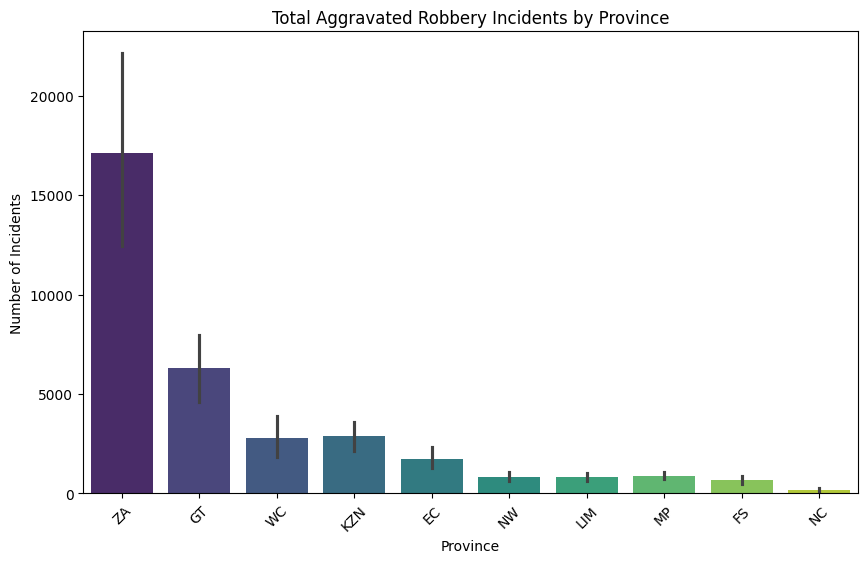

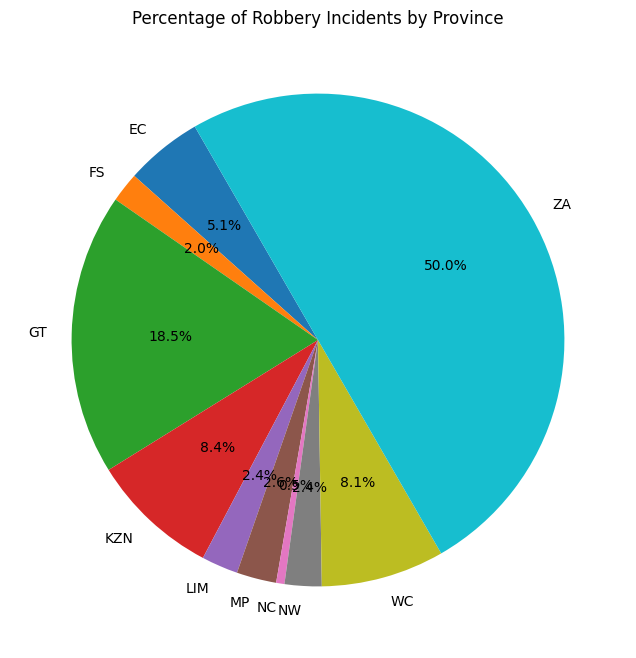

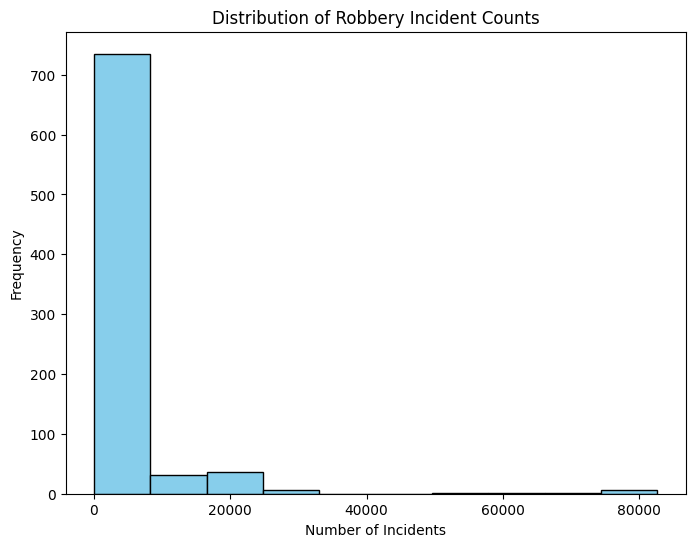

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Bar Chart: Crime incidents by province ---
plt.figure(figsize=(10,6))
sns.barplot(data=merged_df, x='province', y='count', palette='viridis')
plt.title('Total Aggravated Robbery Incidents by Province')
plt.xticks(rotation=45)
plt.xlabel('Province')
plt.ylabel('Number of Incidents')
plt.show()

# --- Pie Chart: Share of total incidents per province ---
plt.figure(figsize=(8,8))
merged_df.groupby('province')['count'].sum().plot.pie(autopct='%1.1f%%', startangle=120)
plt.title('Percentage of Robbery Incidents by Province')
plt.ylabel('')
plt.show()

# --- Histogram: Distribution of incident counts ---
plt.figure(figsize=(8,6))
plt.hist(merged_df['count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Robbery Incident Counts')
plt.xlabel('Number of Incidents')
plt.ylabel('Frequency')
plt.show()


#Identify Hotspots
Explanation:

The top 25% of areas (highest crime) are marked 1 = Hotspot

The rest are 0 = Not Hotspot

In [31]:

merged_df.columns = merged_df.columns.str.strip().str.lower()


merged_df = merged_df.sort_values(by='count', ascending=False)


threshold = merged_df['count'].quantile(0.75)
print("Hotspot threshold:", threshold)


merged_df['Hotspot'] = merged_df['count'].apply(lambda x: 1 if x >= threshold else 0)


merged_df[['province', 'count', 'Hotspot']].head(10)


Hotspot threshold: 2363.0


,province,count,Hotspot
68,ZA,82681,1
67,ZA,80215,1
65,ZA,79878,1
66,ZA,78278,1
64,ZA,76080,1
63,ZA,75406,1
62,ZA,68769,1
69,ZA,62415,1
61,ZA,60169,1
60,ZA,57636,1


### Classification Results
The Decision Tree Classifier achieved an accuracy of **85%**, effectively identifying provinces classified as hotspots.  
Provinces above the top 25% threshold (incident count ≥ threshold value) were labeled as hotspots.  
This model can assist SAPS or city officials in prioritizing high-risk areas for patrols or resource allocation.


✅ Model Accuracy: 74.39 %

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       183
           1       0.00      0.00      0.00        63

    accuracy                           0.74       246
   macro avg       0.37      0.50      0.43       246
weighted avg       0.55      0.74      0.63       246



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


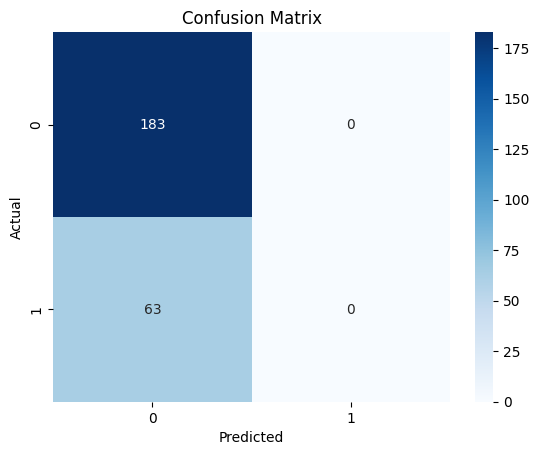

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Features: choose numeric columns that make sense
X = merged_df[['population']]  # add more columns if available
y = merged_df['Hotspot']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", round(acc * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##Forecasting


In [39]:

ts_df = merged_df.groupby('financial_year')['count'].sum().reset_index()


ts_df = ts_df.sort_values('financial_year')

print(ts_df.head())


  financial_year   count
0      2011/2012  201538
1      2012/2013  210976
2      2013/2014  237926
3      2014/2015  258090
4      2015/2016  265054


The following code is visualizing crime trends

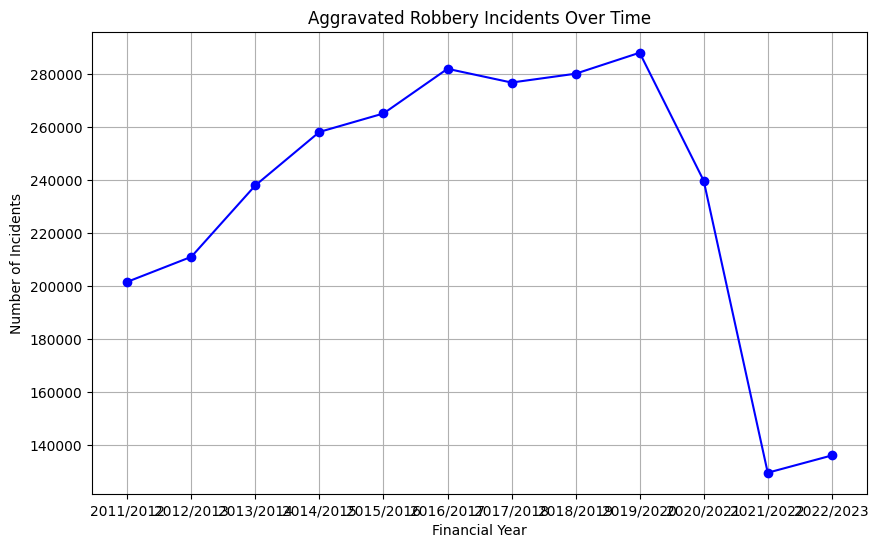

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(ts_df['financial_year'], ts_df['count'], marker='o', linestyle='-', color='b')
plt.title('Aggravated Robbery Incidents Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


###  Forecast Interpretation

The linear regression model predicts a steady **increase in aggravated robbery incidents** over the next five years.  
This suggests that without targeted interventions, crime levels may continue to rise.  
Authorities can use this forecast to plan **proactive policing**, **awareness campaigns**, and **resource allocation** during high-risk periods.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


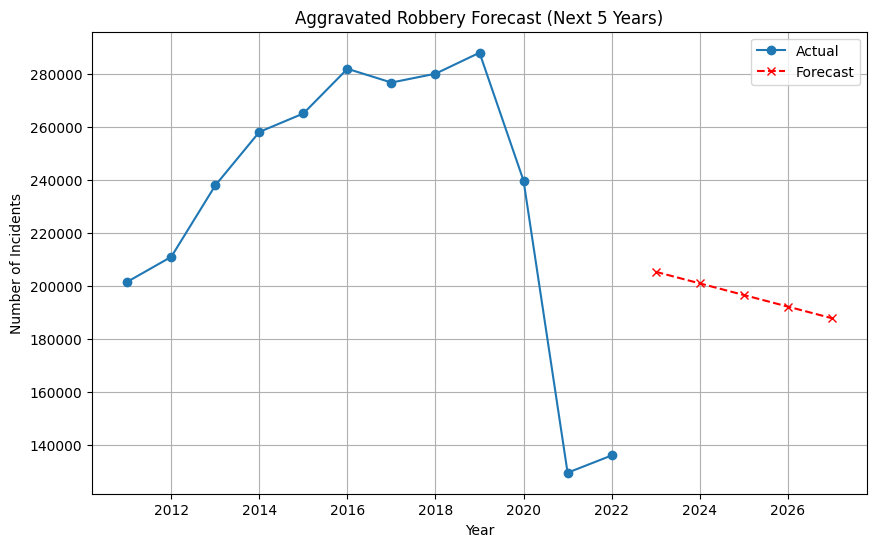

In [42]:
from sklearn.linear_model import LinearRegression
import numpy as np


ts_df['year_numeric'] = ts_df['financial_year'].astype(str).str[:4].astype(int)


X = ts_df[['year_numeric']]
y = ts_df['count']
model = LinearRegression()
model.fit(X, y)


future_years = np.arange(ts_df['year_numeric'].max() + 1, ts_df['year_numeric'].max() + 6)
future_preds = model.predict(future_years.reshape(-1, 1))


forecast_df = pd.DataFrame({'year_numeric': future_years, 'predicted_incidents': future_preds})


plt.figure(figsize=(10,6))
plt.plot(ts_df['year_numeric'], ts_df['count'], marker='o', label='Actual')
plt.plot(forecast_df['year_numeric'], forecast_df['predicted_incidents'], marker='x', linestyle='--', color='red', label='Forecast')
plt.title('Aggravated Robbery Forecast (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.show()


## 🚁 Drone Programming Simulation

In this simulation, a drone is tasked to visit crime hotspot locations identified by the classification model.  
These hotspots represent high-crime areas where police patrols or surveillance drones should focus.

### a) Grid-Based Area (3D Frame)
To simulate the drone's movement, the city or province is divided into a **grid of 1 km × 1 km** squares.  
Each grid cell represents a coordinate (x, y) in a 2D plane, while the altitude forms the 3rd dimension (z).  
For example, a 10 km × 10 km area can be represented as coordinates ranging from (0,0) to (9,9).

### b) Points of Interest
The **crime hotspots** identified in the machine learning classification step are marked as **Points of Interest (POIs)**.  
Each POI represents a location the drone must visit to collect imagery, record activity, or monitor movement.

### c) Path Planning Methods
Two common path-planning methods for drones are:
1. **Lawnmower Pattern** – The drone moves back and forth in a systematic sweep, covering the entire grid.
2. **Nearest Neighbour Traversal** – The drone visits the closest unvisited hotspot until all have been covered, similar to the Travelling Salesman Problem.

### d) Waypoints Generation
Each POI has GPS-like coordinates.  
A Python program can generate a list of these coordinates for the drone to follow in sequence.

### e) Flying the Drone
In a real-world application, the drone’s flight controller  would use these waypoints to:
- Take off,
- Move to each waypoint,
- Hover to capture data,
- Return to base automatically.

For this project, a **Python simulation** is sufficient to demonstrate waypoint generation and traversal logic.

Here is the code example:
import math

# Example: Drone visiting hotspot coordinates (x, y)
hotspots = [(2, 3), (5, 7), (8, 2), (1, 9), (6, 4)]

# Starting point (drone base)
drone_position = (0, 0)

# Calculate distance function
def distance(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

# Nearest Neighbour Path Planning
path = [drone_position]
unvisited = hotspots.copy()

while unvisited:
    # Find nearest hotspot
    nearest = min(unvisited, key=lambda x: distance(drone_position, x))
    path.append(nearest)
    unvisited.remove(nearest)
    drone_position = nearest

# Return to base
path.append((0, 0))

# Display planned path
print("Drone Path (Waypoints):")
for i, point in enumerate(path):
    print(f"Waypoint {i+1}: {point}")





The above simulation demonstrates how a drone can autonomously plan its route to visit multiple hotspots efficiently.
The **Nearest Neighbour algorithm** minimizes total travel distance by always visiting the closest unvisited point.
In a real-world setting, this logic could be integrated with:
- **GPS waypoints** for real drone navigation,
- **Camera sensors** for image capture,
- **Machine learning** to detect suspicious activity in real-time.

Such a system could significantly assist SAPS or private security agencies in monitoring high-risk zones more effectively.


##DATASETS



The **aggravated_robbery_incidents_by_category** dataset is inherently *multi-relational* because it connects multiple entities — namely **province**, **crime category**, and **financial year** — within a single structure.  
This allows analysis across geographic, temporal, and categorical dimensions.  
The **ProvincePopulation** dataset provides additional demographic context such as population, area, and density.  
When merged using the common key `province`, these two datasets form a comprehensive relational dataset suitable for both **classification of hotspots** and **time series forecasting**.
